## Homework Assignment 3 (10 points)

## HSE University, 2023-24 academic year

## About Task

In this homework assignment, you will gain experience in data preparation and EDA (Exploratory Data Analysis), approaching real-world work with data using tools already familiar to you: numpy, pandas, matplotlib, and seaborn, and you will also be introduced to plotly.

EDA is a crucial stage of working with data. It is during the EDA process that you can discover the characteristics of a dataset, find dependencies in the data, and test hypotheses about relationships between features and the target variable. In reality, you would independently decide what and how to examine within the EDA, but in this work, the hypotheses will be proposed for you by the assignment author. Similarly, the types of graphs you will use are also predetermined. While completing the visualization tasks, pay attention to the reference pictures provided by the author. They show the approximate result expected from you.

This assignment will involve creating a certain number of graphs, so here are the main rules according to which the graphs should be formatted:
1. Any graph always has a title.
2. The axes of a graph are labeled (exception: a graph shares an axis label with a neighboring one).
3. Labels are written in a single language (either English or Russian), not a mixture of both.
4. If you output multiple graphs, they are arranged within a single matplotlib.pyplot.figure object. Do not output graphs sequentially; instead, plan how to place them all at once.
5. Individual graphs (if there is more than one graph in the picture) also have their own titles.
6. If a graph contains several different objects, a legend is used to distinguish them. Place the legend where it least interferes with the perception of the graph itself.
7. If there is a legend, it must have a title, and its content should be appropriate (spare the graders—they don't want to figure out what the green line labeled "0" in the legend refers to).
8. Use color palettes so that objects on the graphs are distinguished by color.
9. Text on the visualization must be readable. If you placed category names as labels on the X-axis and these names overlap, you need to address this issue. Unreadable or poorly readable (very small, incredibly large) text will lead to point deductions.

*Here is the rule about plagiarism, which you already know—all works suspected of inappropriate borrowing will be nullified!* Remember, simply copying code from the internet and citing the source is not your independent work, but the work of the code's author. Change at least something in the code.

## About data

We will work with the [Physical Activity Dataset](https://www.kaggle.com/datasets/uciml/human-activity-recognition-with-smartphones).

This dataset contains data from 30 people performing various activities with a smartphone on their waist. The data was recorded using sensors (accelerometer and gyroscope) in this smartphone. The following were recorded: "3-axial linear acceleration" (*tAcc-XYZ*) and "3-axial angular velocity" (*tGyro-XYZ*).

1. All signals are sorted by time and have been filtered for noise.
2. All observations were divided into windows of 128 signals each, with the windows overlapping by 50% (roughly speaking, signals 1 to 128 are in window 1, signals 64 to 192 are in window 2, and so on).
3. The linear acceleration was separated into two components (using a low-frequency filter): the body's own acceleration and the gravitational component. We will call them body acceleration and gravitational acceleration.
4. Various functions were applied to the resulting windows to obtain the following metrics:
    - max
    - min
    - mad (median)
    - mean
    - std
    - skewness (skewness coefficient of the feature distribution in the window)
    - etc. (more details, to the extent possible, are provided on the [dataset page](https://archive.ics.uci.edu/dataset/240/human+activity+recognition+using+smartphones))
5. The magnitude of the signal was also determined via the Euclidean norm of all values from the vector for one window.
6. A Fourier transform was applied to the windows to obtain frequencies. The same metrics were extracted from the frequencies, plus new ones:
    - bandsEnergy (frequency interval energy)
7. Angles between the vectors of corresponding windows were calculated.
8. Derivatives—jerks—were calculated for the accelerations, and the same functions were applied to them.

Result: In the dataset, each feature is some operation on a vector of 128 numbers, which correspond to measurements of a specific person engaged in some activity over 2.56 seconds.

How to read feature names? Examples:
- `tBodyAccMag-mean()` - This is the vector of body accelerations (without the gravitational component of this acceleration), from which the Euclidean norm was taken and then averaged to obtain a scalar.
- `fBodyAcc-bandsEnergy()-1,8.2` - This is the body acceleration vector, to which a Fourier transform was applied, converting it into a frequency vector, and then the energy of this frequency interval within a specific frequency range (in this case 1 - 8.2) was calculated on this vector.
- `angle(X,gravityMean)` - This is the angle between the X-axis and the vector of averaged gravitational acceleration values from the corresponding window.

It might seem complicated at first, but we will analyze some features individually, and you will be able to understand their meaning based on actual relationships.

## Data Preprocessing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv("test.csv")

In [ ]:
print(train.shape)
print(test.shape)

(7352, 563)
(2947, 563)


The dataset has 563 features, including the target variable. We don't need that many features. We have made a subset of features for you for ease of work.

In [ ]:
cols_subset = [
    'tBodyAccMag-mean()',
    'tBodyGyroJerk-mad()-X',
    'tGravityAcc-min()-X',
    'tBodyAcc-max()-X',
    'fBodyAcc-bandsEnergy()-1,8.2',
    'angle(X,gravityMean)',
    'angle(Y,gravityMean)',
    'angle(Z,gravityMean)',
    'fBodyAcc-skewness()-X',
    'subject',
    'Activity',
]

In [ ]:
train = train[cols_subset]
test = test[cols_subset]

### Task 1 (0.5 points)

Examine the missing values and duplicates in the train and test data. Are there any? If so, explain what this might be related to? If not, simply state that there are no missing values and/or duplicates.

In [ ]:
test_missing = test.isnull().sum()
test_duplicate = test.duplicated().sum()
train_missing = train.isnull().sum()
train_duplicate = train.duplicated().sum()
print(test_missing) # There are no missing values in the "test" dataframe
print(test_duplicate) # There are no duplicates in the "test" dataframe
print(train_missing) # There are no missing values in the "train" dataframe
print(train_duplicate) # There are no duplicates in the "train" dataframe

tBodyAccMag-mean()              0
tBodyGyroJerk-mad()-X           0
tGravityAcc-min()-X             0
tBodyAcc-max()-X                0
fBodyAcc-bandsEnergy()-1,8.2    0
angle(X,gravityMean)            0
angle(Y,gravityMean)            0
angle(Z,gravityMean)            0
fBodyAcc-skewness()-X           0
subject                         0
Activity                        0
dtype: int64
0
tBodyAccMag-mean()              0
tBodyGyroJerk-mad()-X           0
tGravityAcc-min()-X             0
tBodyAcc-max()-X                0
fBodyAcc-bandsEnergy()-1,8.2    0
angle(X,gravityMean)            0
angle(Y,gravityMean)            0
angle(Z,gravityMean)            0
fBodyAcc-skewness()-X           0
subject                         0
Activity                        0
dtype: int64
0


There are no missing values or duplicates in the test and train datasets.



### Task 2 (0.5 points)

Print the main data statistics: mean, median, percentiles (0.25, 0.5, 0.75), minimum, maximum, standard deviation. Look at the table and write if you see anything interesting in it.

In [ ]:
stat_test = test.describe()
stat_test.drop(["count"])
stat_test.loc[len(stat_test.index)] = test.median()
stat_test.rename(index={8: 'median'}, inplace= True)
stat_test = test.describe()
stat_test.drop(["count"])
stat_test.loc[len(stat_test.index)] = test.median()
stat_test.rename(index={8: 'median'}, inplace= True)

stat_train = train.describe()
stat_train.drop(["count"])
stat_train.loc[len(stat_train.index)] = train.median()
stat_train.rename(index={8: 'median'}, inplace= True)
stat_train = train.describe()
stat_train.drop(["count"])
stat_train.loc[len(stat_train.index)] = train.median()
stat_train.rename(index={8: 'median'}, inplace= True)
stat_train

In [ ]:
stat_test

tBodyAccMag-mean()  tBodyGyroJerk-mad()-X  tGravityAcc-min()-X  \
count         2947.000000            2947.000000          2947.000000   
mean            -0.559043              -0.735661             0.696878   
std              0.439539               0.282074             0.502873   
min             -0.998936              -1.000000            -0.756774   
25%             -0.978433              -0.989078             0.836787   
50%             -0.861830              -0.914698             0.934930   
75%             -0.149596              -0.486423             0.970871   
max              0.479547               0.117606             0.996148   

       tBodyAcc-max()-X  fBodyAcc-bandsEnergy()-1,8.2  angle(X,gravityMean)  \
count       2947.000000                   2947.000000           2947.000000   
mean          -0.462063                     -0.880361             -0.513923   
std            0.523916                      0.160496              0.509205   
min           -0.952357                     -0.999989             -0.984195   
25%           -0.934447                     -0.999330             -0.829722   
50%           -0.852659                     -0.979336             -0.729648   
75%           -0.009965                     -0.799113             -0.545939   
max            0.786436                      0.048730              0.833180   

       angle(Y,gravityMean)  angle(Z,gravityMean)  fBodyAcc-skewness()-X  \
count           2947.000000           2947.000000            2947.000000   
mean               0.074886             -0.048720              -0.154042   
std                0.324300              0.241467               0.392203   
min               -0.913704             -0.949228              -1.000000   
25%                0.022140             -0.098485              -0.497070   
50%                0.181563             -0.010671              -0.202050   
75%                0.260252              0.092373               0.140254   
max                1.000000              0.973113               0.960367   

           subject  
count  2947.000000  
mean     12.986427  
std       6.950984  
min       2.000000  
25%       9.000000  
50%      12.000000  
75%      18.000000  
max      24.000000

An interesting observation is that the descriptive statistics in both datasets are very similar (for example, means, standard deviations, quartiles, and medians). Additionally, the median values are relatively high for all features (except the last three or four), considering that they do not exceed an absolute value of 1.

### Task 3 (0.5 points)

Are the data balanced? You have 6 activity categories (the target variable). If one category is represented by a large number of observations while the others are not, this is a circumstance worth knowing in advance. An exaggerated example: imagine you have 1000 observations split into two classes, and only 5 belong to the second class. How to train a model on such a sample? There is a strong suspicion that many models will tend to degenerate into a constant. Hence, the need to check class balance.

Print the number of observations for all activity categories in train and test. Calculate the percentage difference between the largest category and the smallest one (the largest category is 100%). If the difference (rounded to the nearest integer) does not exceed 30%, then for our purposes let's consider the data balanced. State whether the data in train and test are balanced.

In [ ]:
print(train["Activity"].value_counts()) # Number of observations for all activity categories in train
print(test["Activity"].value_counts()) # Number of observations for all activity categories in test

table_train = train.groupby('Activity').size() / len(train["Activity"]) * 100 # Table showing the percentage value of each feature in Activity
dif_train = round(table_train.max() - table_train.min()) # Difference between the largest and smallest categories, rounded to the nearest integer
table_test = test.groupby('Activity').size() / len(test["Activity"]) * 100 # Table showing the percentage value of each feature in Activity
dif_test = round(table_test.max() - table_test.min()) # Difference between the largest and smallest categories, rounded to the nearest integer
print(dif_train, dif_test) # The data in train and test are balanced (the difference between the largest and smallest categories does not exceed 30%).

Activity
LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: count, dtype: int64
Activity
LAYING                537
STANDING              532
WALKING               496
SITTING               491
WALKING_UPSTAIRS      471
WALKING_DOWNSTAIRS    420
Name: count, dtype: int64
6 4


The data in train and test are balanced (the difference between the largest and smallest categories does not exceed 30%). In train, this difference is 6%, and in test, it is 4%.

### Task 4 (0.5 points)

Calculate the correlations of all features (including the target) with all others. What are the resulting values? Any ideas why? Share your thoughts.

In [ ]:
train_copy = train.copy()
train_copy = pd.get_dummies(train, columns=["Activity"])
test_copy = test.copy()
test_copy = pd.get_dummies(test, columns=["Activity"])
train_copy.corr()

tBodyAccMag-mean()  tBodyGyroJerk-mad()-X  \
tBodyAccMag-mean()                      1.000000               0.899080   
tBodyGyroJerk-mad()-X                   0.899080               1.000000   
tGravityAcc-min()-X                     0.369962               0.380118   
tBodyAcc-max()-X                        0.959827               0.879900   
fBodyAcc-bandsEnergy()-1,8.2            0.697832               0.507939   
angle(X,gravityMean)                   -0.370849              -0.382246   
angle(Y,gravityMean)                    0.495561               0.478567   
angle(Z,gravityMean)                    0.426283               0.380967   
fBodyAcc-skewness()-X                   0.379796               0.266002   
subject                                -0.073652              -0.110321   
Activity_LAYING                        -0.396643              -0.386730   
Activity_SITTING                       -0.396389              -0.379403   
Activity_STANDING                      -0.414460              -0.370699   
Activity_WALKING                        0.358825               0.531695   
Activity_WALKING_DOWNSTAIRS             0.561344               0.445048   
Activity_WALKING_UPSTAIRS               0.405434               0.257524   

                              tGravityAcc-min()-X  tBodyAcc-max()-X  \
tBodyAccMag-mean()                       0.369962          0.959827   
tBodyGyroJerk-mad()-X                    0.380118          0.879900   
tGravityAcc-min()-X                      1.000000          0.380404   
tBodyAcc-max()-X                         0.380404          1.000000   
fBodyAcc-bandsEnergy()-1,8.2             0.239088          0.613383   
angle(X,gravityMean)                    -0.988663         -0.384192   
angle(Y,gravityMean)                     0.797116          0.480229   
angle(Z,gravityMean)                     0.667415          0.405023   
fBodyAcc-skewness()-X                   -0.261676          0.335708   
subject                                 -0.042371         -0.055633   
Activity_LAYING                         -0.973167         -0.394745   
Activity_SITTING                         0.187055         -0.387297   
Activity_STANDING                        0.262354         -0.399861   
Activity_WALKING                         0.234820          0.298526   
Activity_WALKING_DOWNSTAIRS              0.192409          0.658369   
Activity_WALKING_UPSTAIRS                0.159741          0.347429   

                              fBodyAcc-bandsEnergy()-1,8.2  \
tBodyAccMag-mean()                                0.697832   
tBodyGyroJerk-mad()-X                             0.507939   
tGravityAcc-min()-X                               0.239088   
tBodyAcc-max()-X                                  0.613383   
fBodyAcc-bandsEnergy()-1,8.2                      1.000000   
angle(X,gravityMean)                             -0.213318   
angle(Y,gravityMean)                              0.363170   
angle(Z,gravityMean)                              0.423927   
fBodyAcc-skewness()-X                             0.260316   
subject                                          -0.037000   
Activity_LAYING                                  -0.287395   
Activity_SITTING                                 -0.276766   
Activity_STANDING                                -0.296141   
Activity_WALKING                                  0.189834   
Activity_WALKING_DOWNSTAIRS                       0.217399   
Activity_WALKING_UPSTAIRS                         0.534750   

                              angle(X,gravityMean)  angle(Y,gravityMean)  \
tBodyAccMag-mean()                       -0.370849              0.495561   
tBodyGyroJerk-mad()-X                    -0.382246              0.478567   
tGravityAcc-min()-X                      -0.988663              0.797116   
tBodyAcc-max()-X                         -0.384192              0.480229   
fBodyAcc-bandsEnergy()-1,8.2             -0.213318              0.363170   
angle(X,gravityMean)               

In [ ]:
test_copy.corr()

tBodyAccMag-mean()  tBodyGyroJerk-mad()-X  \
tBodyAccMag-mean()                      1.000000               0.934773   
tBodyGyroJerk-mad()-X                   0.934773               1.000000   
tGravityAcc-min()-X                     0.407084               0.393773   
tBodyAcc-max()-X                        0.965114               0.898628   
fBodyAcc-bandsEnergy()-1,8.2            0.767875               0.625414   
angle(X,gravityMean)                   -0.400871              -0.387274   
angle(Y,gravityMean)                    0.439051               0.423288   
angle(Z,gravityMean)                    0.425011               0.368411   
fBodyAcc-skewness()-X                   0.365670               0.278765   
subject                                -0.057359              -0.079811   
Activity_LAYING                        -0.432375              -0.409460   
Activity_SITTING                       -0.401367              -0.395664   
Activity_STANDING                      -0.414812              -0.379256   
Activity_WALKING                        0.382256               0.522026   
Activity_WALKING_DOWNSTAIRS             0.533885               0.464393   
Activity_WALKING_UPSTAIRS               0.399410               0.255742   

                              tGravityAcc-min()-X  tBodyAcc-max()-X  \
tBodyAccMag-mean()                       0.407084          0.965114   
tBodyGyroJerk-mad()-X                    0.393773          0.898628   
tGravityAcc-min()-X                      1.000000          0.386764   
tBodyAcc-max()-X                         0.386764          1.000000   
fBodyAcc-bandsEnergy()-1,8.2             0.301643          0.707129   
angle(X,gravityMean)                    -0.989043         -0.384454   
angle(Y,gravityMean)                     0.697006          0.410477   
angle(Z,gravityMean)                     0.633881          0.398008   
fBodyAcc-skewness()-X                   -0.237864          0.338543   
subject                                  0.004927         -0.071786   
Activity_LAYING                         -0.983505         -0.407889   
Activity_SITTING                         0.196159         -0.396788   
Activity_STANDING                        0.244371         -0.408003   
Activity_WALKING                         0.227835          0.281951   
Activity_WALKING_DOWNSTAIRS              0.193024          0.638335   
Activity_WALKING_UPSTAIRS                0.163337          0.364582   

                              fBodyAcc-bandsEnergy()-1,8.2  \
tBodyAccMag-mean()                                0.767875   
tBodyGyroJerk-mad()-X                             0.625414   
tGravityAcc-min()-X                               0.301643   
tBodyAcc-max()-X                                  0.707129   
fBodyAcc-bandsEnergy()-1,8.2                      1.000000   
angle(X,gravityMean)                             -0.279783   
angle(Y,gravityMean)                              0.327473   
angle(Z,gravityMean)                              0.446245   
fBodyAcc-skewness()-X                             0.293881   
subject                                          -0.090817   
Activity_LAYING                                  -0.342430   
Activity_SITTING                                 -0.295023   
Activity_STANDING                                -0.323854   
Activity_WALKING                                  0.213190   
Activity_WALKING_DOWNSTAIRS                       0.270809   
Activity_WALKING_UPSTAIRS                         0.524637   

                              angle(X,gravityMean)  angle(Y,gravityMean)  \
tBodyAccMag-mean()                       -0.400871              0.439051   
tBodyGyroJerk-mad()-X                    -0.387274              0.423288   
tGravityAcc-min()-X                      -0.989043              0.697006   
tBodyAcc-max()-X                         -0.384454              0.410477   
fBodyAcc-bandsEnergy()-1,8.2             -0.279783              0.327473   
angle(X,gravityMean)               

On the main diagonal, the values are 1 because the correlation of a feature with itself is 1. Beyond that, the spread of values is quite varied, making it difficult to say anything specific. There is a strong level of correlation between some features (for example, between Activity_LAYING and tGravityAcc-min()-X), and there are also very weak correlations.

Congratulations! You have preprocessed the data for the most comfortable subsequent analysis. Now you are ready to proceed with Exploratory Data Analysis!

## Exploratory Data Analysis

### Task 5 (0.5 points)

You have checked the basic information about the data and formed your first impression. Now, visualizations.

Let's start drawing graphs with a little warm-up. Choose any two mathematical functions (different from linear) and plot them on the same graph. Label each graph so it's clear which functions you chose. An example is provided below.

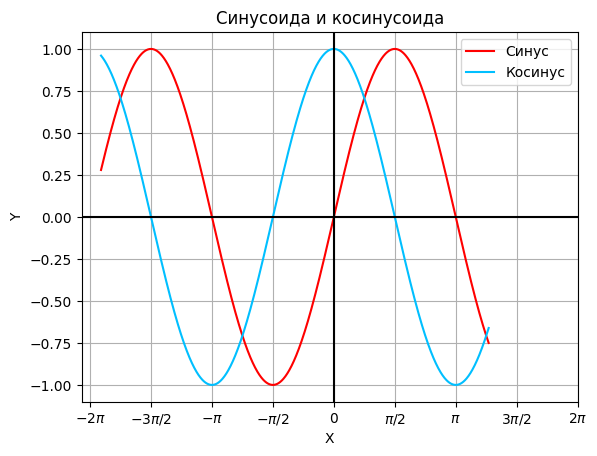

In [ ]:
x = np.arange(-6, 4, 0.01)
plt.plot(x, np.sin(x), color='red', label='Sine')
plt.plot(x, np.cos(x), color='deepskyblue', label='Cosine')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Sine and Cosine Waves')
plt.grid()
plt.xticks(
    np.linspace(-2 * np.pi, 2 * np.pi, 9),
    [r'$-2\pi$', r'$-3\pi/2$', r'$-\pi$', r'$-\pi/2$', r'$0$',
     r'$\pi/2$', r'$\pi$', r'$3\pi/2$', r'$2\pi$'])
plt.axhline(0, c="k")
plt.axvline(0, c="k")
plt.show()

### Task 6 (0.5 points)

We have already checked the balance of the data across different activity categories in the train and test sets. Now, visualize the number of samples in each category separately for the train and test sets, as in the example below. Ensure that the order of categories is the same on the left and right. Otherwise, it's not very convenient to compare them (when they are in different positions on the two graphs). Also, note that in the example, the X-axis is on the same scale, which is also convenient for comparison.

You might find the following useful:
- plt.barh or ax.barh

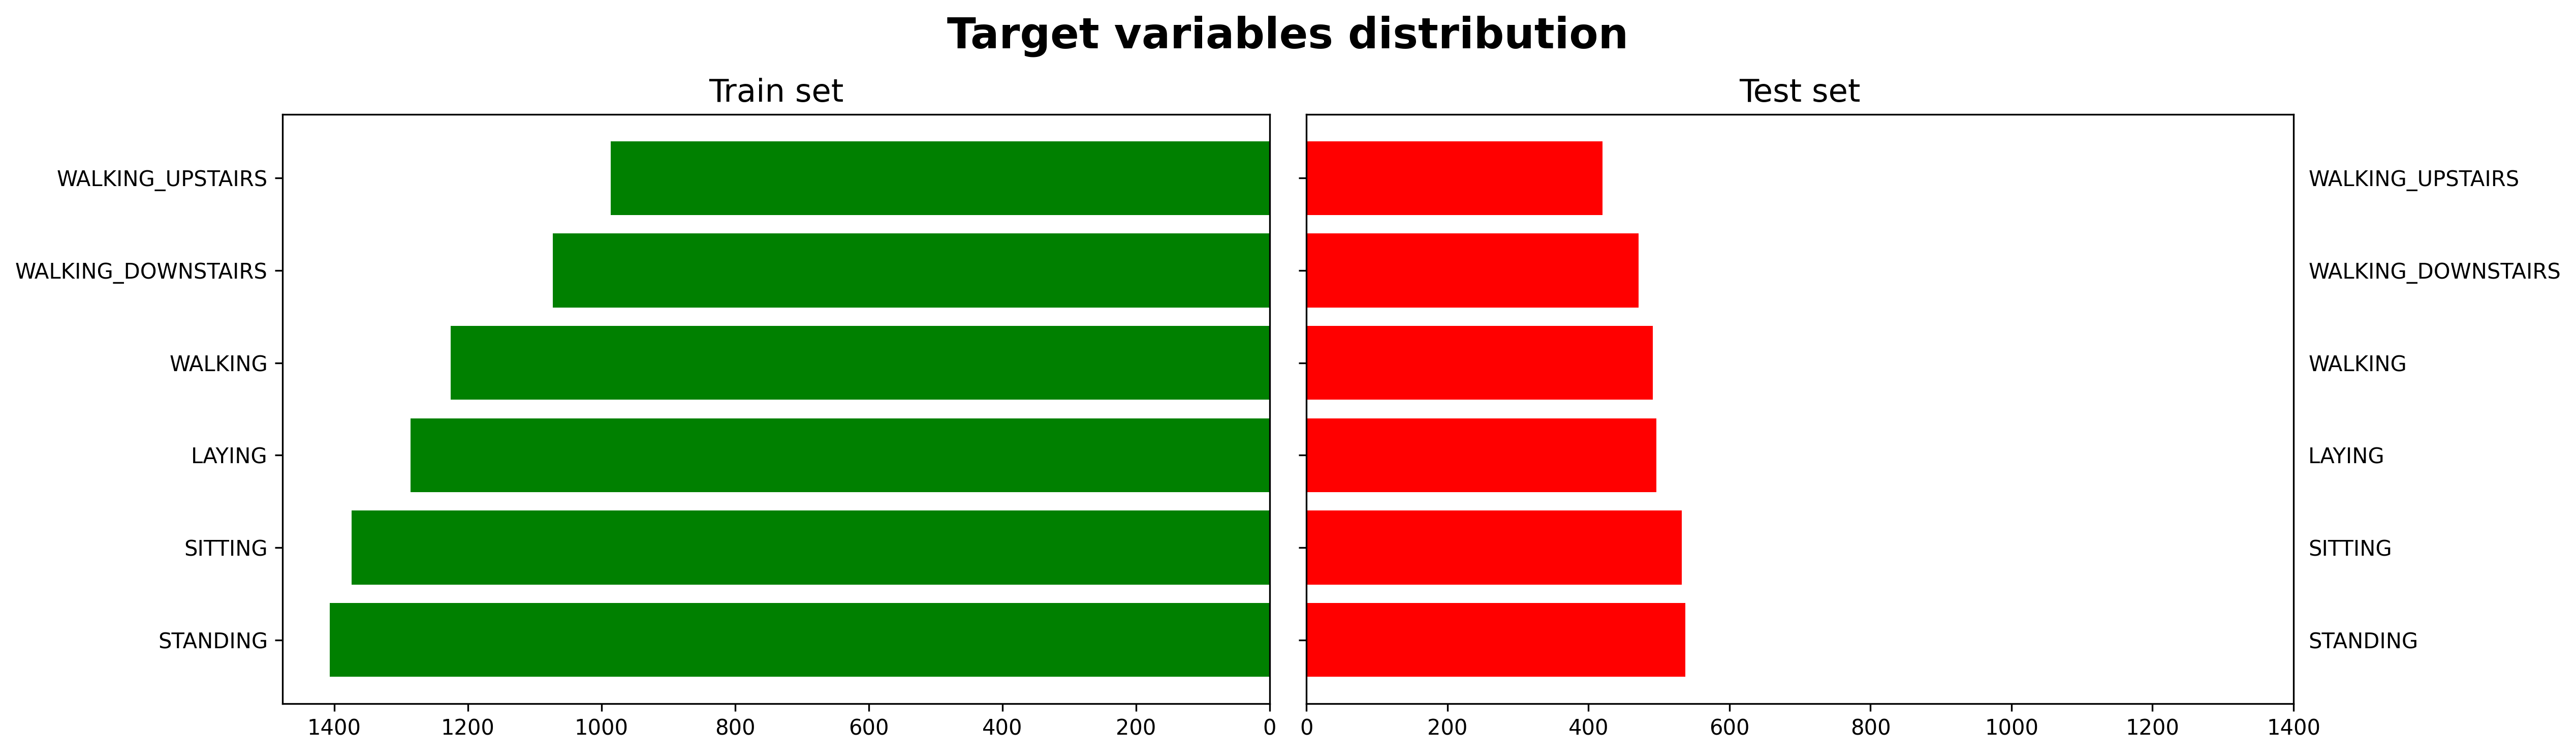

In [ ]:
plt.figure(figsize=(17, 5), dpi=300)

plt.subplot(1, 2, 1)
y = train["Activity"].value_counts()
x = train["Activity"].unique()
plt.barh(x, y, color="g")
plt.gca().invert_xaxis()
plt.title('Train set', fontsize=15)

plt.subplot(1, 2, 2)
b = test["Activity"].value_counts()
a = test["Activity"].unique()
plt.barh(a, b, color="r")
plt.xlim(0, 1400)
plt.tick_params(axis='y', which='both', labelleft=False, labelright=True)
plt.title('Test set', fontsize=15)
plt.tight_layout()
plt.subplots_adjust(top=0.85)

plt.suptitle('Target variables distribution', fontsize=20, fontweight='bold')
plt.show()


It's true that such graphs make it easier to check the class balance of the target, isn't it?

### Task 7 (0.5 points)

Earlier, you printed a correlation table. However, a simple correlation table is not very convenient for analysis. What if there were more features? Visualize the correlation heatmap. Label the correlation values on the graph, rounded to 2 decimal places, and keep only those values whose absolute value is not less than 0.5. We will consider such correlations significant. If you take the code from the seminar notebook, change something in it, for example, the color palette; otherwise, the grader will penalize you :)

Which feature should be excluded from the correlation analysis? Write its name and the reason why it makes no sense to consider it.

You might find the following useful:
- sns.heatmap
- The get_text and set_text methods of the graph's texts attribute.


In [ ]:
cor = sns.heatmap(train.corr(), cmap="Greens", annot=True, fmt="0.2f")
for t in cor.texts:
    if float(t.get_text()) >= 0.5 or float(t.get_text()) <= -0.5:
        t.set_text(t.get_text())
    else:
        t.set_text("")
plt.title("Correlation heatmap", fontsize=20, fontweight='bold');


It is worth excluding the feature **Activity** from consideration because it is categorical, and calculating the correlation between categorical (even if encoded as numbers) and interval features is not very appropriate.

### Task 8 (0.5 points)

To start, let's use a sledgehammer to crack a nut. Display a pairplot for all data in the train set. Write whether you noticed anything interesting in it that wasn't in the tables and graphs earlier, and also report whether it was convenient for you to analyze 100 graphs.

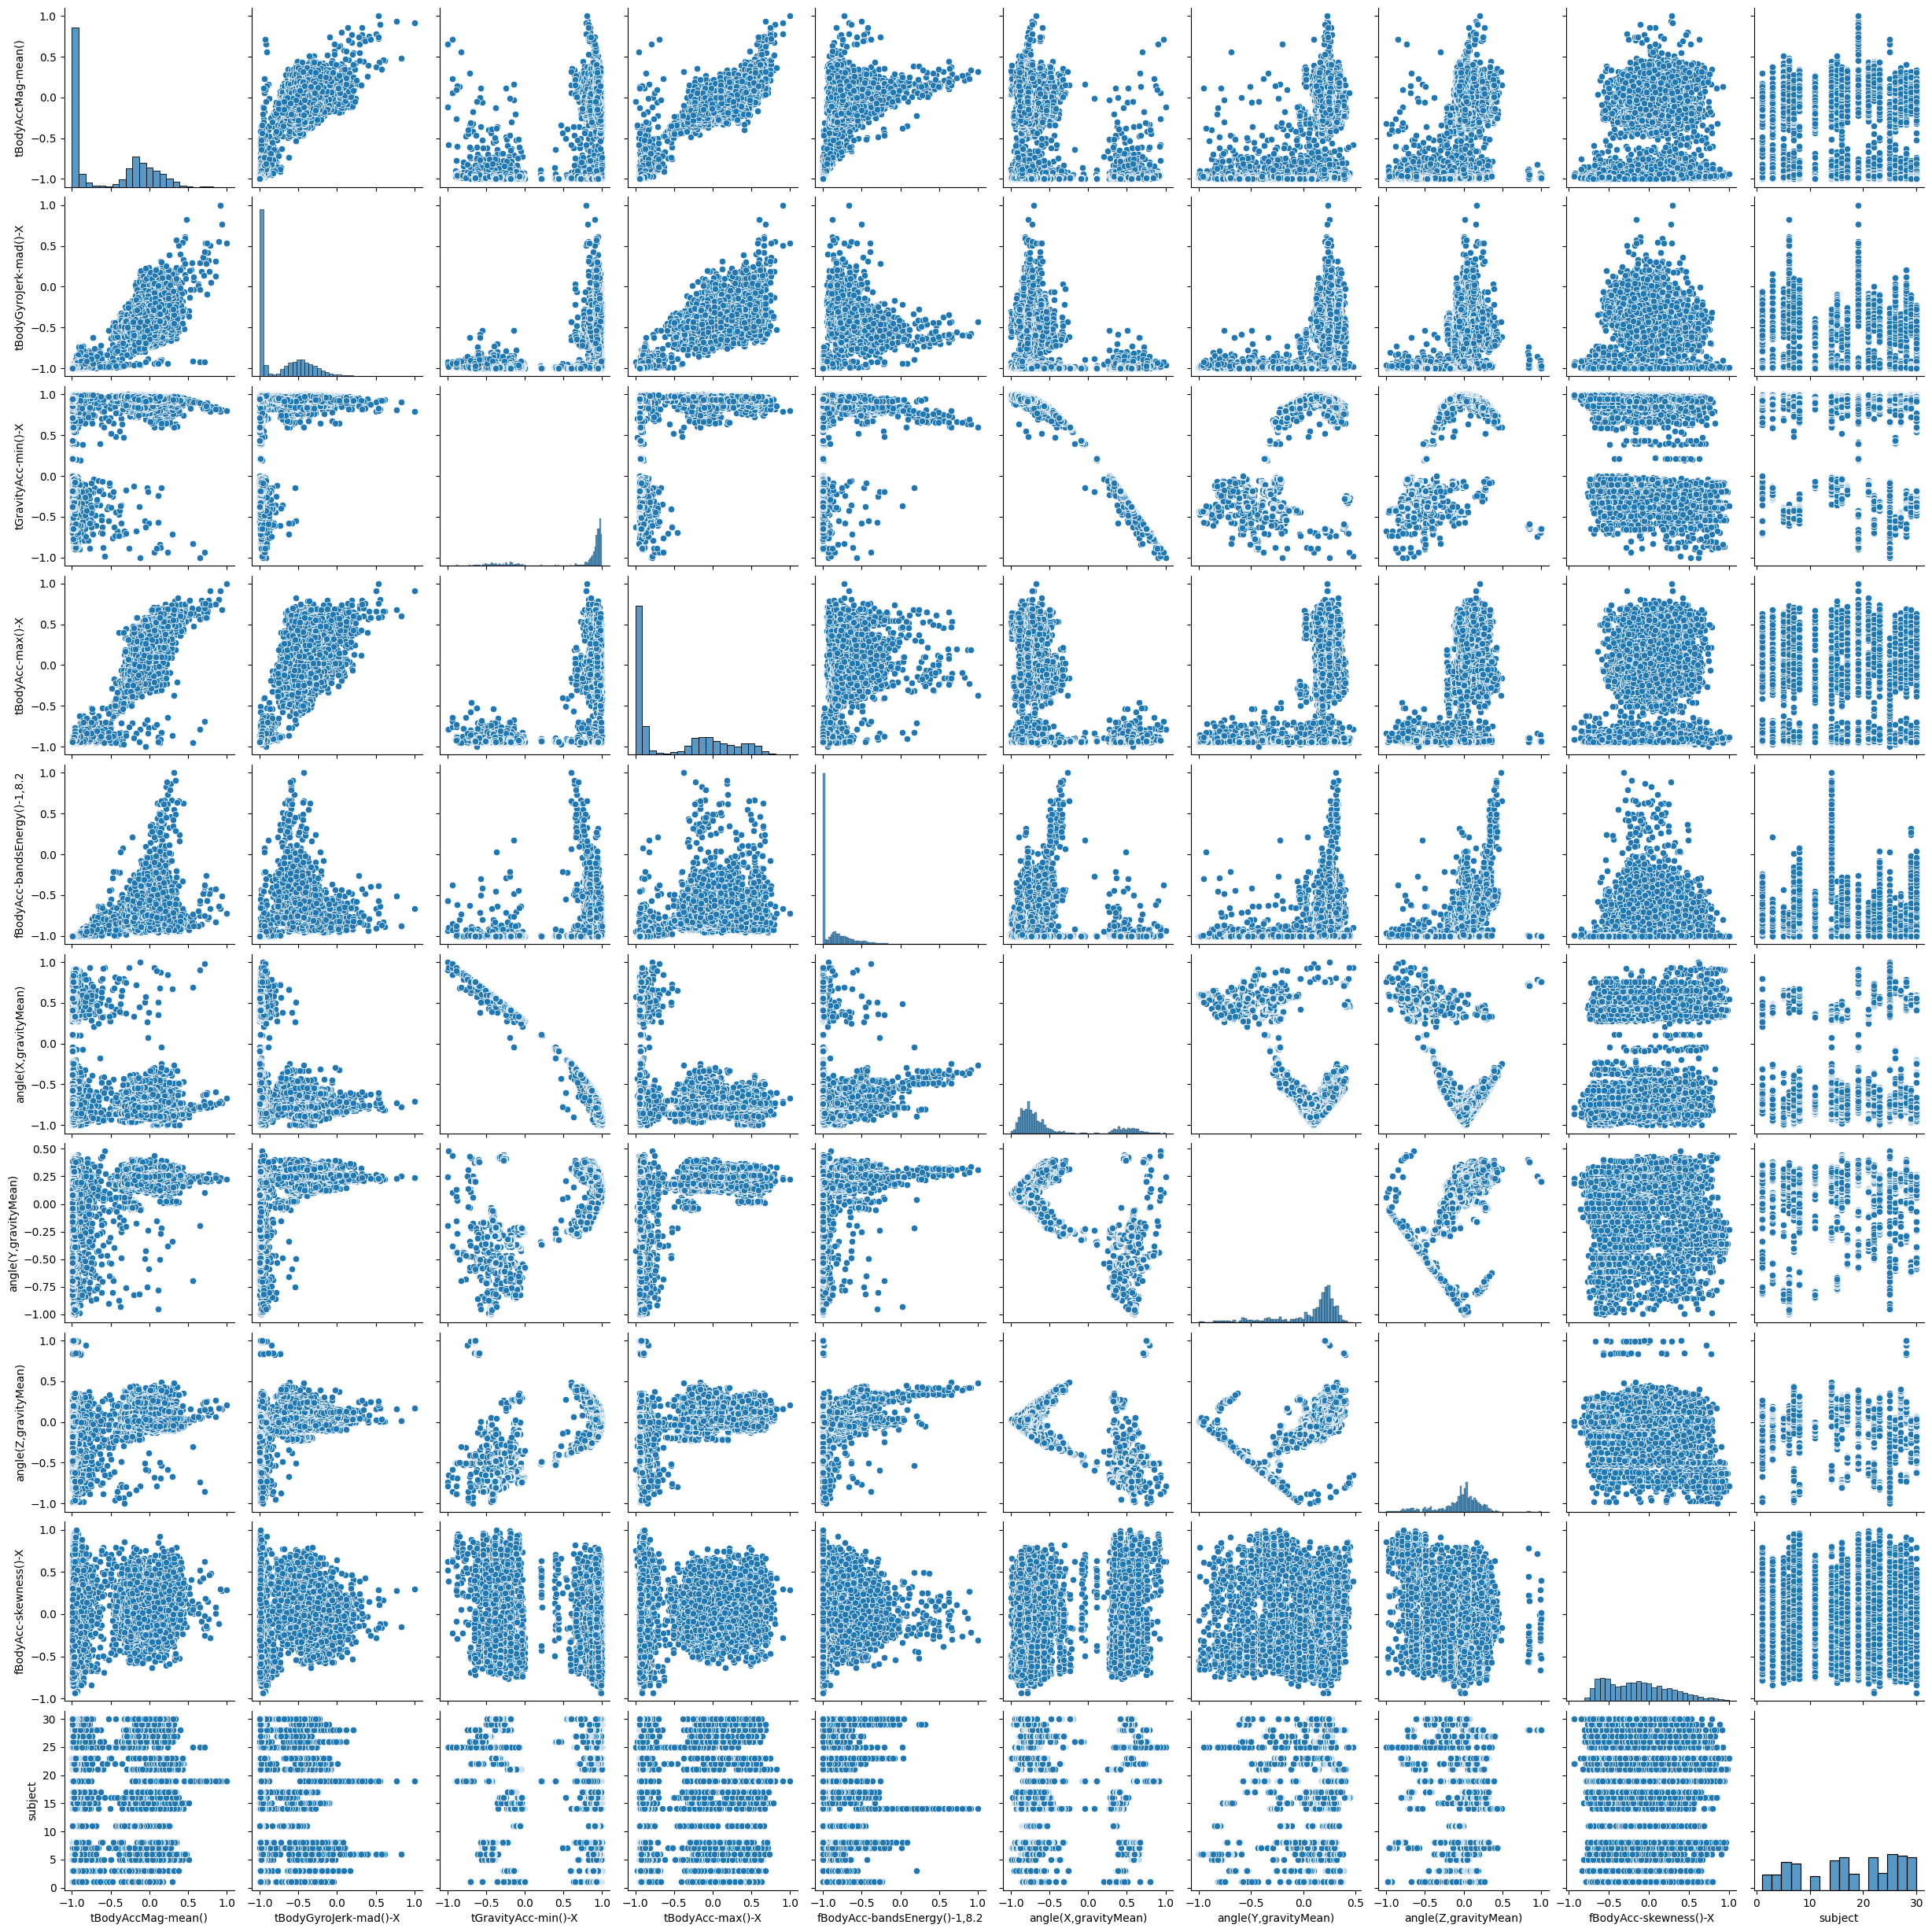

In [ ]:
sns.pairplot(train)

It is difficult to notice anything substantial on such graphs in principle, as they are inconvenient to read and analyze due to their scale and visualization.

### Task 9 (1 point)

Okay. Looking at everything at once isn't very convenient. It seems we need to look at features individually and search for insights within them.

Let's try to test a hypothesis. Display the distribution density (kde) of `tBodyAccMag-mean()` for each activity, as in the example below. Do you see a pattern? Can all activities be divided into two groups? If yes, draw a vertical line that visually separates these groups reasonably well.

Let's call the first group static activities and the second group dynamic activities.

Calculate what proportion of correct answers your vertical line provides for separating exactly these two groups. What might your obtained result be related to? Provide a logical justification (why exactly this feature separates activity groups so well/poorly).

You might find the following useful:
- sns.kdeplot

1.0
1.0
1.0


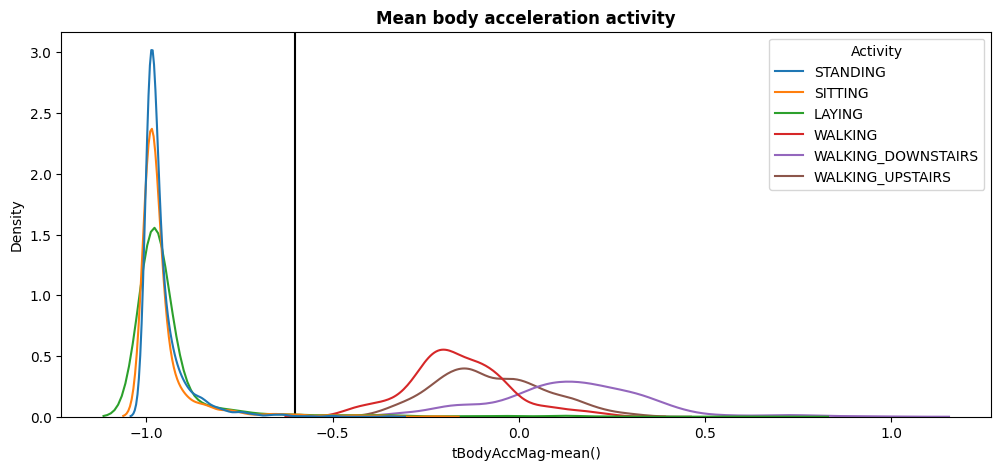

In [ ]:
plt.figure(figsize=(12, 5), dpi=100)
plt.axvline(-0.6, c="k")
sns.kdeplot(data=train, x='tBodyAccMag-mean()', hue='Activity')
plt.title('Mean body acceleration activity', fontsize=12, fontweight='bold')
walking_true = train[(train["Activity"] == 'WALKING') & (train['tBodyAccMag-mean()'] > -0.6)].value_counts()
walking_downstairs_true = train[(train["Activity"] == 'WALKING_DOWNSTAIRS') & (train['tBodyAccMag-mean()'] > -0.6)].value_counts()
walking_upstairs_true = train[(train["Activity"] == 'WALKING_UPSTAIRS') & (train['tBodyAccMag-mean()'] > -0.6)].value_counts()
print(walking_true.shape[0] / train[(train["Activity"] == 'WALKING')].shape[0])
print(walking_downstairs_true.shape[0] / train[(train["Activity"] == 'WALKING_DOWNSTAIRS')].shape[0])
print(walking_upstairs_true.shape[0] / train[(train["Activity"] == 'WALKING_UPSTAIRS')].shape[0])

For separating these two groups, the vertical line y = -0.6 provides 100% correct separation for the features located to its right. For the features in the left part, there is a small error, but it is close to zero. This feature (Body Acceleration Vector) separates the activity groups well because it is directly related to speed depending on the activity. That is, a person lying down/sitting/standing will have a very small (if not zero) acceleration vector, while during movement, this vector will be significantly higher.

### Task 10 (0.5 points)

Congratulations, you have tested the first hypothesis during the EDA process. However, we would like to be able to distinguish not just groups, but each individual type of activity. Try to draw boxplots for `angle(X,gravityMean)` with separation by different types of activities on the train data. Can any conclusions be drawn from this visualization? Analyze and interpret the resulting pictures (if you notice any peculiarity, such as a certain category standing out significantly, suggest why this might have happened).

You might find the following useful:
- sns.boxplot

Text(0.5, 1.0, 'Angle between  X-axis and gravitational acceleration')

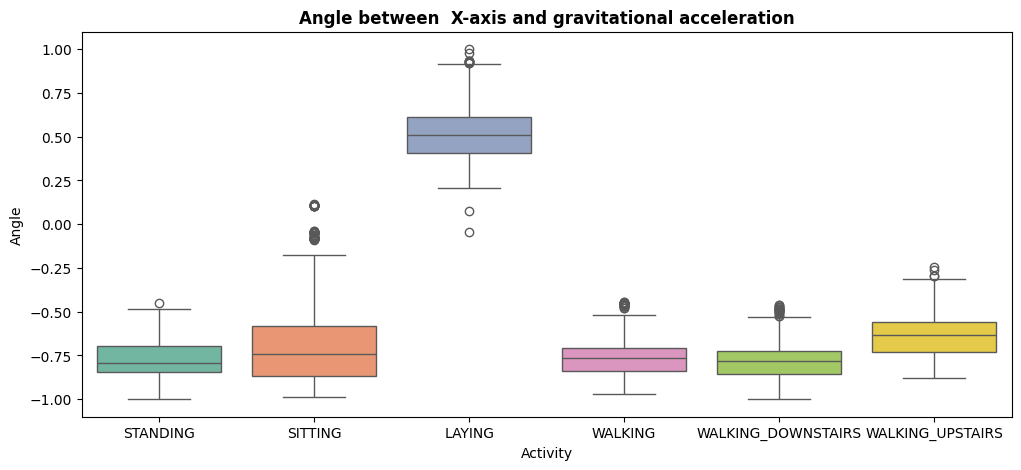

In [ ]:
plt.figure(figsize=(12, 5), dpi=100)
sns.boxplot(data=train, x='Activity', y='angle(X,gravityMean)', palette = "Set2")
plt.ylabel("Angle")
plt.title('Angle between  X-axis and gravitational acceleration', fontsize=12, fontweight='bold')

It is evident that the most distinct category is where the features of a person in a lying position were measured. Overall, this is logical because a lying person generally does not perform any movements (they might even be asleep), while the other categories have more significant indicators of movement, speed, gravity (as in this case), and so on.

### Task 11 (0.5 points)

Now let's look at `tBodyAcc-max()-X`. Visualize violin plots for this feature, separated by activities, across the entire train set. It seems logical that the maximum instantaneous acceleration would differ for various activities. However, is there any activity that stands out? If so, suggest an explanation for why this activity stands out.

You might find the following useful:
- sns.violinplot

Text(0.5, 1.0, 'Maximal body acceleration over activities')

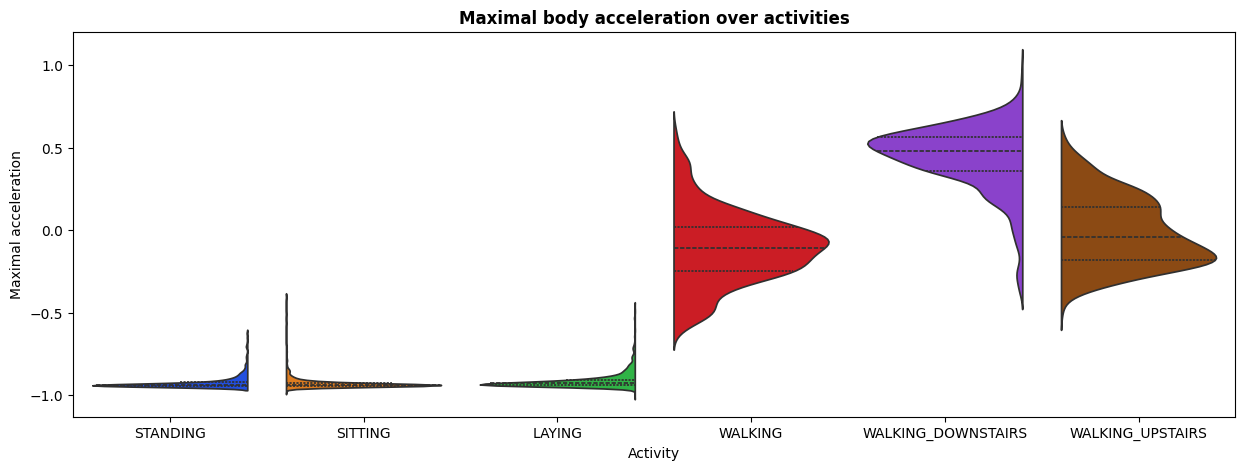

In [ ]:
plt.figure(figsize=(15, 5), dpi=100)
sns.violinplot(data=train, x='Activity', y='tBodyAcc-max()-X', palette = "bright", inner="quart", split=True)
plt.ylabel("Maximal acceleration")
plt.title('Maximal body acceleration over activities', fontsize=12, fontweight='bold')

Overall, three groups of activities stand out: regular walking, walking upstairs, and walking downstairs. The greatest maximum instantaneous acceleration is observed when walking downstairs (which makes it slightly stand out from the others). This is logical, as during this activity, a person gains more speed than during regular walking and especially walking upstairs.

### Task 12 (1 point)

You can already distinguish two categories of activity out of six with fairly good quality. Let's continue.

Earlier, we mentioned dividing activities into two groups: static and dynamic. Now it's time to split the train dataset into two parts. Do this! Now, on a single figure, show the distributions of `fBodyAcc-bandsEnergy()-1,8.2` for dynamic activities (boxenplot - a slightly modified "box and whiskers" plot) and `angle(Y,gravityMean)` for static activities - a simple histogram will suffice here (exactly as in the example below). Can any additional activities be distinguished? If yes, write which activities stand out in graphs 1 and 2.

You might find the following useful:
- plt.subplots or matplotlib.gridspec (did you notice that one graph is larger than the other? Try doing this yourself - you'll like it...)
- sns.boxenplot
- sns.histplot

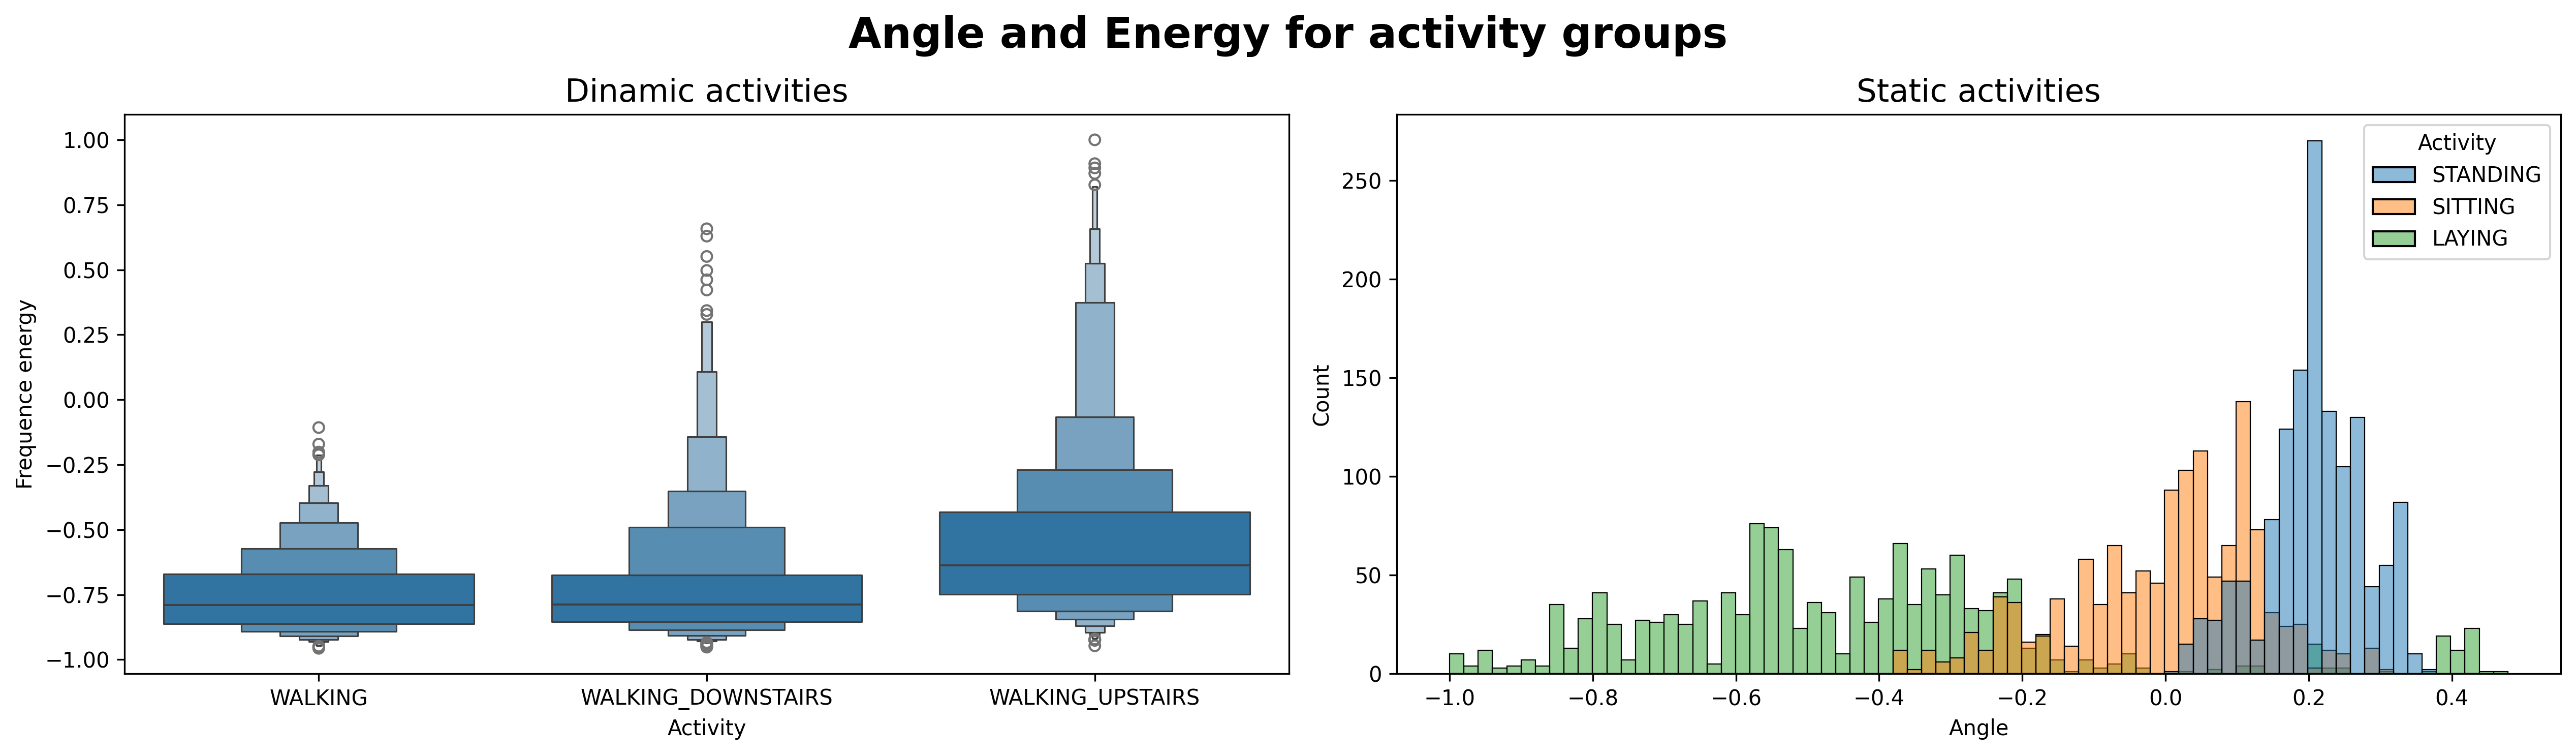

In [ ]:
dinamic = train[(train['Activity'] == 'WALKING') | (train['Activity'] == 'WALKING_DOWNSTAIRS') | (train['Activity'] == 'WALKING_UPSTAIRS')]
static = train[(train['Activity'] == 'STANDING') | (train['Activity'] == 'SITTING') | (train['Activity'] == 'LAYING')]
plt.figure(figsize=(17, 5), dpi=300)

plt.subplot(1, 2, 1)
sns.boxenplot(data=dinamic, x='Activity', y='fBodyAcc-bandsEnergy()-1,8.2')
plt.ylabel("Frequence energy")
plt.title('Dinamic activities', fontsize=15)

plt.subplot(1, 2, 2)
sns.histplot(data=static, x='angle(Y,gravityMean)', hue='Activity', binwidth=0.02)
plt.xlabel("Angle")
plt.title('Static activities', fontsize=15)
plt.tight_layout()
plt.subplots_adjust(top=0.85)

plt.suptitle('Angle and Energy for activity groups', fontsize=20, fontweight='bold')
plt.show()

On the first graph, the category **walking upstairs** stands out (logically, since significantly more effort and energy are expended, so the median is higher than for the others). At the same time, there are several outliers, likely corresponding to moments when the person was walking upstairs very slowly.

On the second graph, a peak for the **walking** category can be observed around the value of 0.2. Otherwise, the graphs are quite consistent, progressing from less energy-intensive categories to more energy-intensive ones.

### Task 13 (0.5 points)

Life is not always so easy, and data are not always fully or almost linearly separable by a single feature (otherwise, what would data scientists do...). Often, data cannot be adequately separated by any single feature (or even by combinations of features). Let's try taking not one feature, but a whole two!

Let's consider only static activities. There will again be two graphs at once. The first graph will be a boxplot of the distribution of `fBodyAcc-skewness()-X` across activities. For the second graph, let's try taking not all observations of this activity group, but only a part of them. Are the categories separable by `fBodyAcc-skewness()-X`? And if we take only those rows where `fBodyAcc-skewness()-X < -0.376`, and now plot a boxplot of the distribution of `angle(Y,gravityMean)` across different activities? Give it a try and write if any category stands out?

You might find the following useful:
- plt.subplots or matplotlib.gridspec
- sns.boxplot

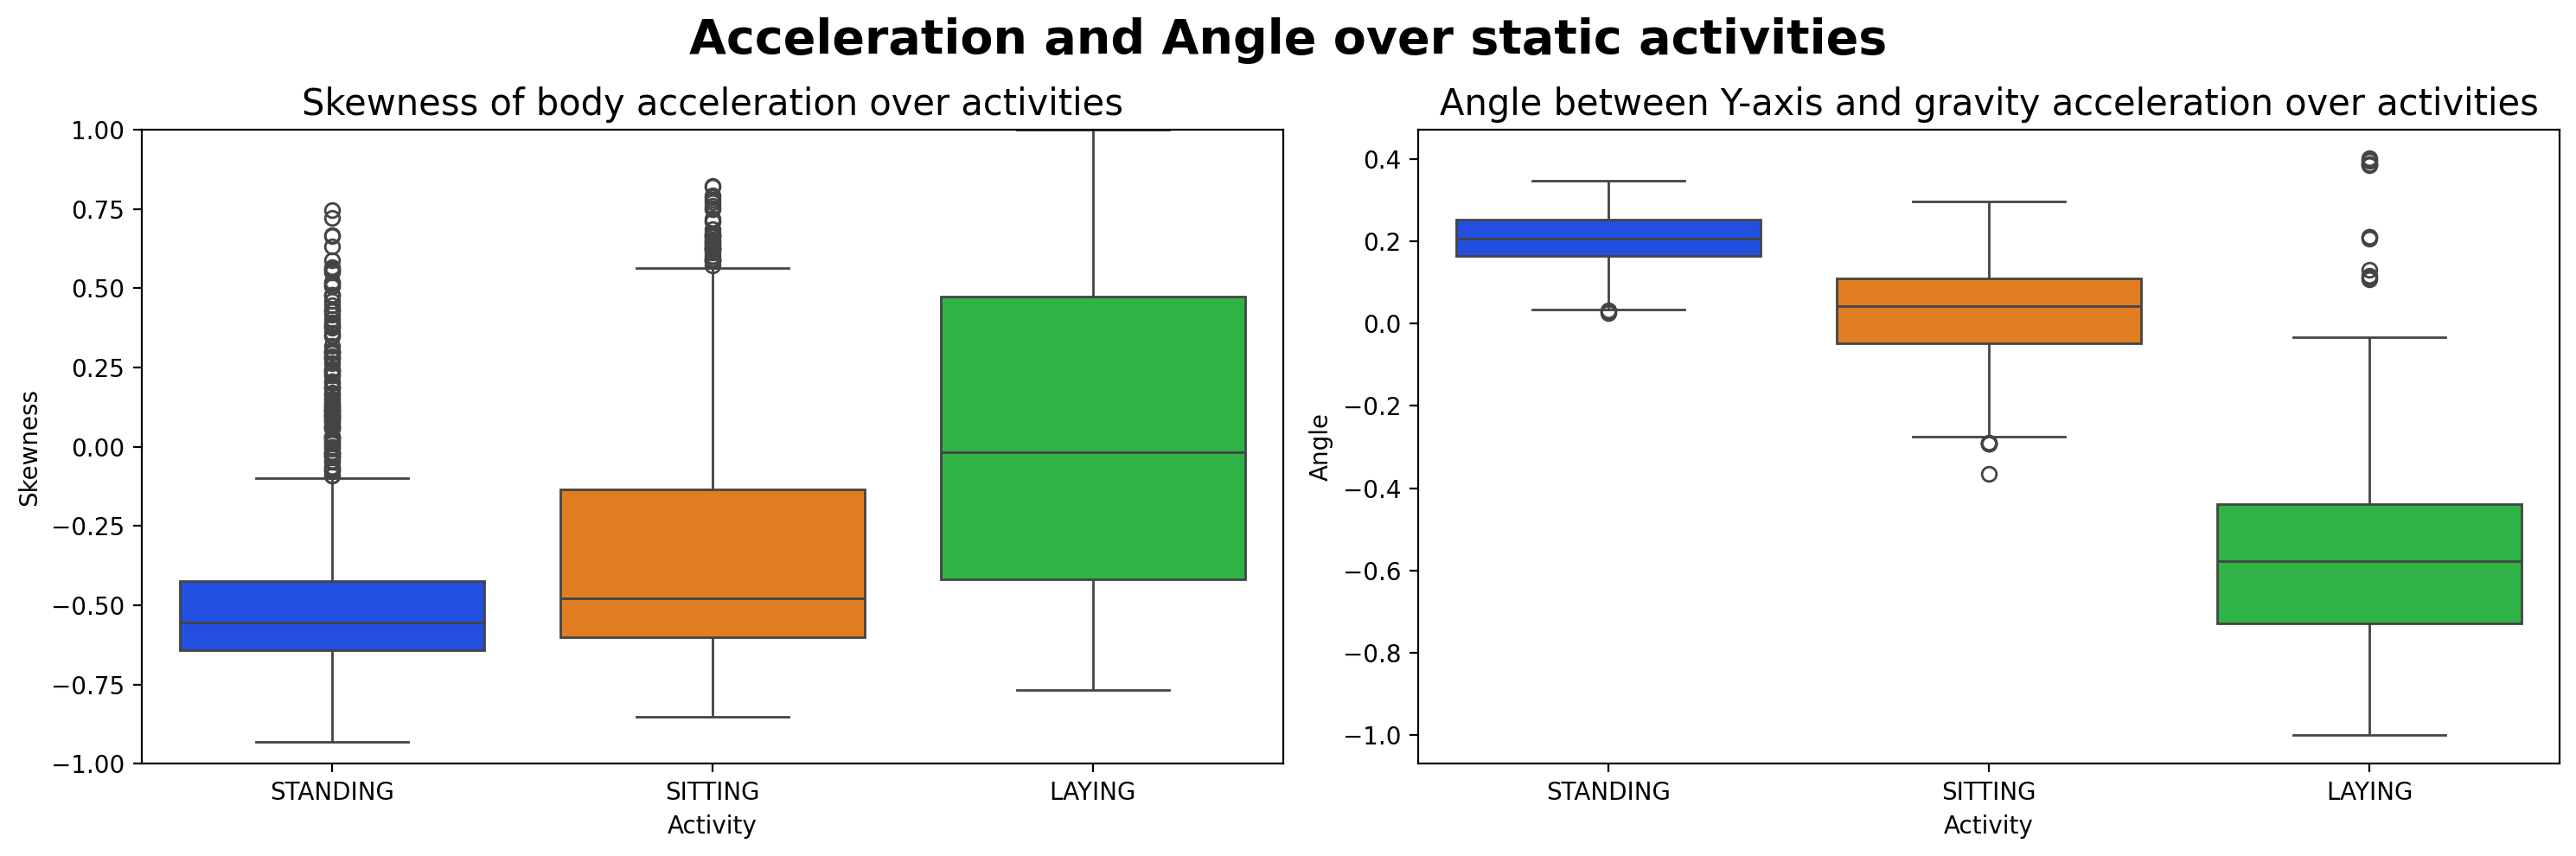

In [ ]:
static = train[(train['Activity'] == 'STANDING') | (train['Activity'] == 'SITTING') | (train['Activity'] == 'LAYING')]
static_new = train[((train['Activity'] == 'STANDING') | (train['Activity'] == 'SITTING') | (train['Activity'] == 'LAYING')) & (train['fBodyAcc-skewness()-X'] < -0.376)]
plt.figure(figsize=(15, 5), dpi=200)

plt.subplot(1, 2, 1)
sns.boxplot(data=static, x='Activity', y='fBodyAcc-skewness()-X', palette = "bright")
plt.ylim(-1, 1)
plt.ylabel("Skewness")
plt.title('Skewness of body acceleration over activities', fontsize=15)

plt.subplot(1, 2, 2)
sns.boxplot(data=static_new, x='Activity', y='angle(Y,gravityMean)', palette = "bright")
plt.ylabel("Angle")
plt.title('Angle between Y-axis and gravity acceleration over activities', fontsize=15)
plt.tight_layout()
plt.subplots_adjust(top=0.85)

plt.suptitle('Accеleration and Angle over static activities', fontsize=20, fontweight='bold')
plt.show()


On the first graph, it is evident that the activity categories can be separated by the skewness of the acceleration frequency: the median values and spread are different for all (with lying having the highest values). However, after applying the condition of skewness less than -0.376, the separation becomes even more pronounced. Here, the categories **standing** and **lying** can be distinguished, as they differ the most from each other in the feature `angle(Y,gravityMean)`.

Congratulations, you are now one step closer to becoming a decision tree!

### Task 14 (1 point)

Only one activity remains that we haven't managed to distinguish. Let's try to separate it from all the others using some thresholds. Yes, one could argue that since we've already distinguished 5 out of 6 categories, everything else must be the last category, but we don't take the easy way out. Distinguishing the remaining category with good quality is not that simple. From the available features, first look at the distribution of `tBodyAcc-max()-X` across dynamic activities (a violin plot will work perfectly).

Now, we provide you with the threshold `tBodyAcc-max()-X < 0.157`. For such rows, build a scatter plot for the feature `tGravityAcc-min()-X`. Yes, it doesn't turn out perfectly, but it's honest work. You can choose a threshold so that, purely from the table with dynamic activities, from rows where `tBodyAcc-max()-X < 0.157`, select rows based on a certain threshold for `tGravityAcc-min()-X` such that the proportion of correct answers for the remaining category is at least 83%!

You might find the following useful:
- plt.subplots or matplotlib.gridspec
- sns.violinplot
- sns.swarmplot (sometimes better suited than just sns.scatterplot)

Note that axis labels can be removed using plt methods. For example, if you have a common label for the Y-axis for both graphs, you can leave the Y-axis of the second graph unlabeled.

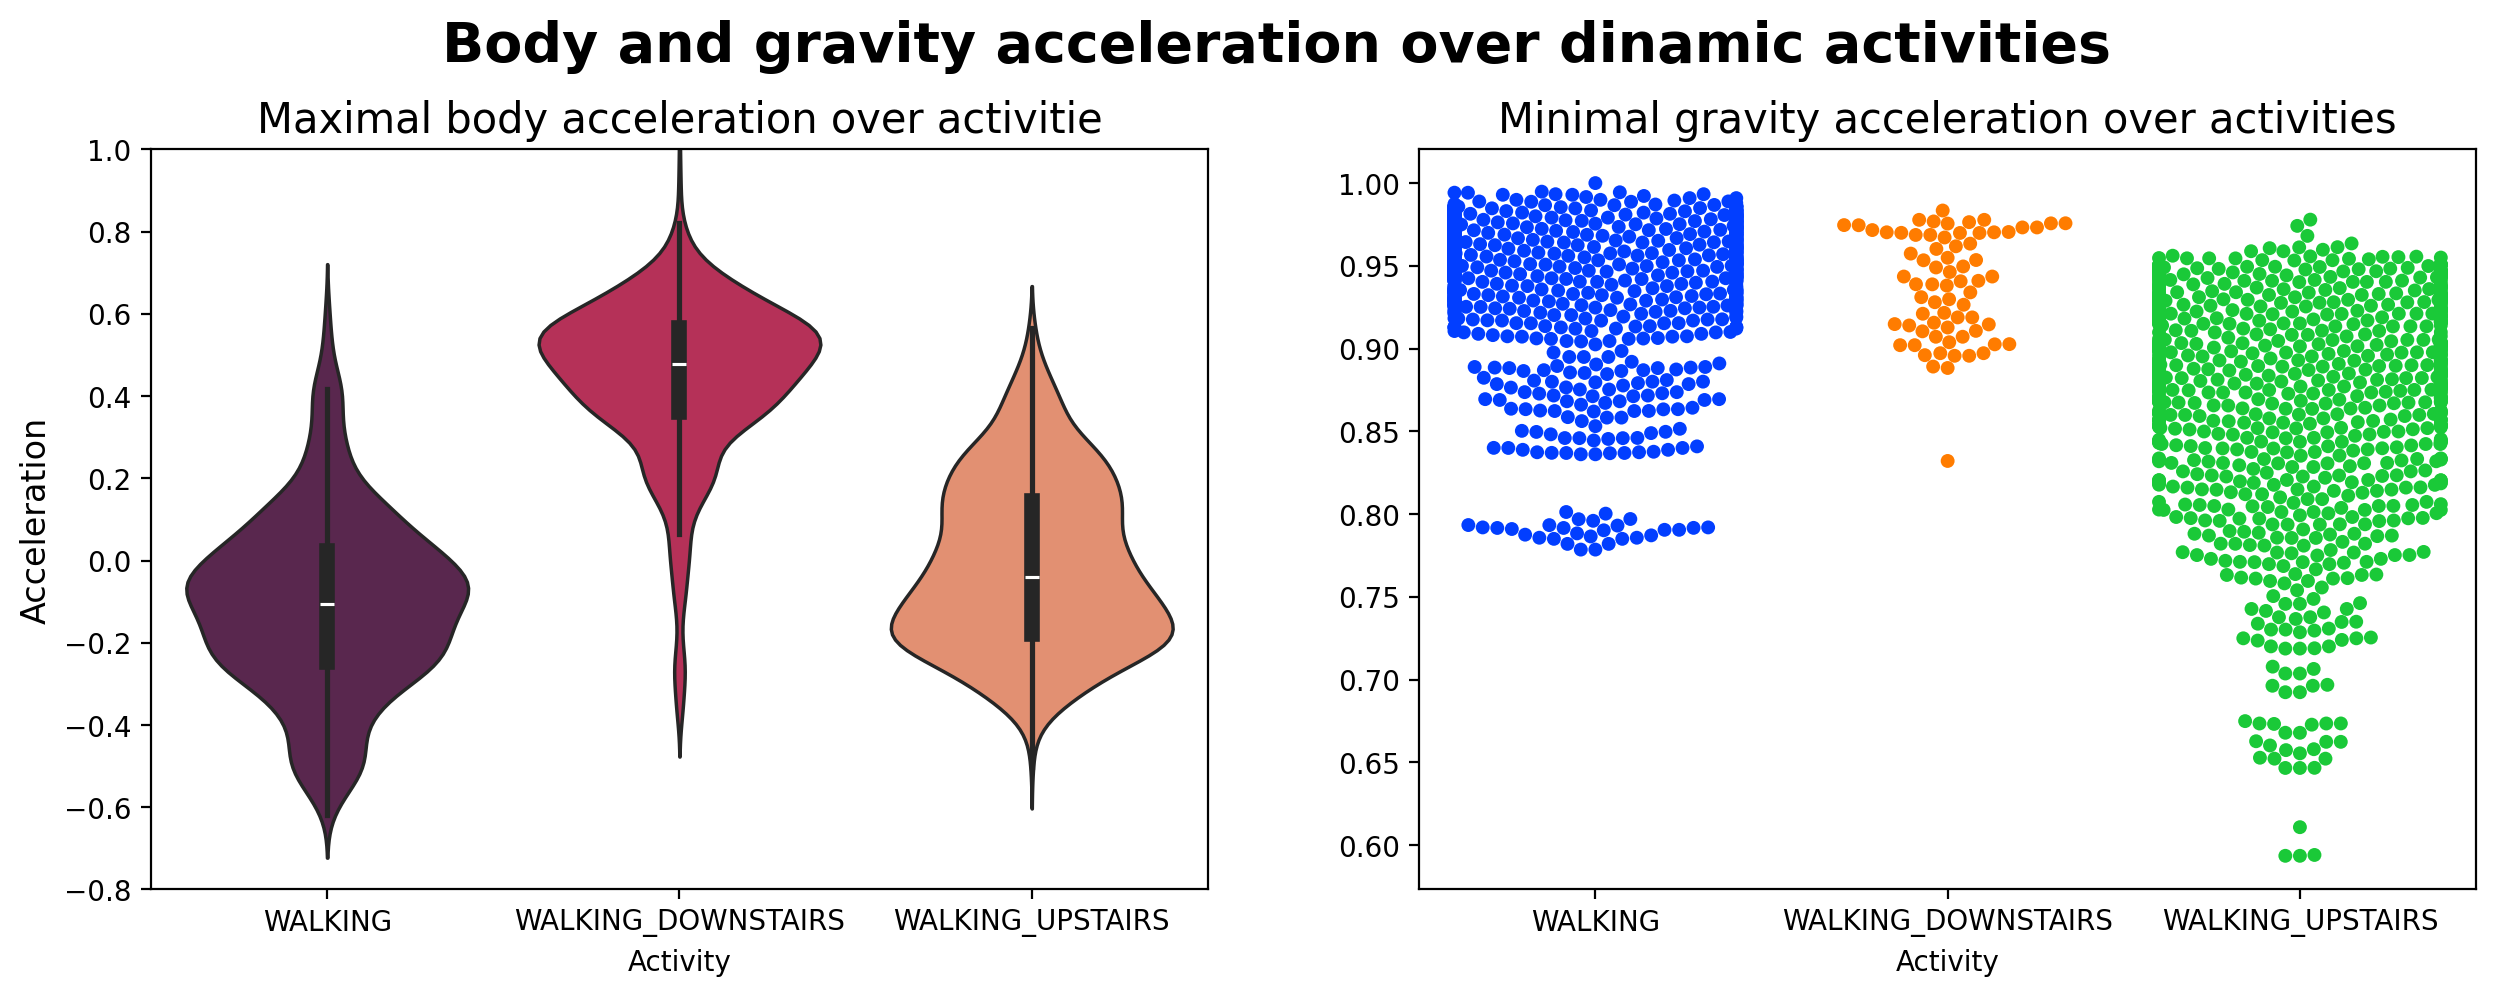

In [ ]:
dinamic = train[(train['Activity'] == 'WALKING') | (train['Activity'] == 'WALKING_DOWNSTAIRS') | (train['Activity'] == 'WALKING_UPSTAIRS')]
dinamic_new = train[((train['Activity'] == 'WALKING') | (train['Activity'] == 'WALKING_DOWNSTAIRS') | (train['Activity'] == 'WALKING_UPSTAIRS')) & (train['tBodyAcc-max()-X'] < 0.157)]
plt.figure(figsize=(15, 5), dpi=200)

plt.subplot(1, 2, 1)
sns.violinplot(data=dinamic, x='Activity', y='tBodyAcc-max()-X', palette = "rocket")
plt.ylim(-0.8, 1)
plt.ylabel("Acceleration", fontsize=12)
plt.title('Maximal body acceleration over activitie', fontsize=15)

plt.subplot(1, 2, 2)
sns.swarmplot(data=dinamic_new, x='Activity', y='tGravityAcc-min()-X', palette = "bright")
plt.title('Minimal gravity acceleration over activities', fontsize=15)
plt.ylabel("")
plt.subplots_adjust(top=0.85)

plt.suptitle('Body and gravity acceleration over dinamic activities', fontsize=20, fontweight='bold')
plt.show()

### Task 15 (0.5 points)

Now let's try more interactive graphs. Install the `plotly` library (usually `pip install plotly` or `conda install plotly`). The syntax is very similar to `seaborn`, but here is the [documentation for plotly.express](https://plotly.com/python-api-reference/plotly.express.html).

First, prepare the data for visualization. We will treat t-SNE as simply a "black box" that takes our data and projects it into two-dimensional or three-dimensional space. You might have to wait a bit.

In [ ]:
%%time
from sklearn.manifold import TSNE
tsne = TSNE(random_state=666, n_components=2)
new = tsne.fit_transform(train.drop(['subject', 'Activity'], axis=1))
df_2_comp = pd.concat([
    pd.DataFrame(new, columns=['x', 'y']),
    train['Activity']
], axis=1)

tsne = TSNE(random_state=666, n_components=3)
new = tsne.fit_transform(train.drop(['subject', 'Activity'], axis=1))
df_3_comp = pd.concat([
    pd.DataFrame(new, columns=['x', 'y', 'z']),
    train['Activity']
], axis=1)

CPU times: total: 8min 20s
Wall time: 1min 55s


Now, create a scatter plot using `plotly.express` for `df_2_comp` with activities highlighted by colors. Does it look good? Are clusters of points of the same color visible? Can different activities be separated by lines on this graph?

In [ ]:
import plotly.express as px


px.scatter(df_2_comp, x="x", y="y", color='Activity')


It turned out beautifully, though not entirely clear in some places because the points overlap and end up obscuring each other. Otherwise, it's a very pleasant graph, easy to interpret, as clusters of points are visible (even considering the overlapping).

We keep up with the trends and can do 3D too. Now you'll learn (if you don't already know). Draw a scatter_3d plot using `plotly.express` for `df_3_comp` with activities highlighted by colors. Rotate it around. Does it look okay? Is there any structure to the points?

In [ ]:
px.scatter_3d(df_3_comp, x='x', y='y', z='z', color='Activity')


The points are structured; each feature is grouped within its own measurement dimension. It's very convenient to analyze because you can rotate and view it from all angles.

### Task 16 (1 point)

We performed the fit for you. Now it's your turn to do the predict. Complete the function that takes a dataframe with features as input and outputs a vector of predictions—for each row of the dataframe, you determine which class the object belongs to. We recommend writing it out in string format rather than encoding it as numbers. Then, the `accuracy_score` function will give you the proportion of correct answers.

Hint: you have already separated categories from each other based on certain features. Use this knowledge! Using only the analysis you conducted, you can easily achieve at least 75% on both train and test! If you get less than 75%, points will be deducted. The author's solution (based on all the graphs above) achieves 81% and 77% on train and test, respectively. [Cheat sheet with ready-made ideas for such a task](https://www.youtube.com/watch?v=dQw4w9WgXcQ)

In [ ]:
def predict(df: pd.DataFrame):
    if df[(df['Activity'] == 'WALKING') | (df['Activity'] == 'WALKING_DOWNSTAIRS') | (df['Activity'] == 'WALKING_UPSTAIRS')]:

    if df[(df['Activity'] == 'SITTING') | (df['Activity'] == 'LAYING') | (df['Activity'] == 'STANDING')]:
    pass

def accuracy_score(y_true, y_pred) -> float:
    y_true = np.asarray(y_true).reshape(-1, 1)
    y_pred = np.asarray(y_pred).reshape(-1, 1)
    return (y_true == y_pred).mean()

In [ ]:
train_preds = predict(train)
test_preds = predict(test)
print(f"Accuracy on train set => {accuracy_score(train['Activity'], train_preds)}")
print(f"Accuracy on test set => {accuracy_score(test['Activity'], test_preds)}")

Accuracy on train set => 0.0
Accuracy on test set => 0.0


A place for a meme and/or feedback

